In [2]:
import pandas as pd
df = pd.read_csv('/content/boardgame-geek-dataset_organized.csv', encoding='latin1')
df.head()
df.info()
df[["avg_rating", "max_playtime"]].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   row_id             2000 non-null   int64  
 1   boardgame          2000 non-null   object 
 2   release_year       2000 non-null   int64  
 3   min_players        2000 non-null   int64  
 4   max_players        2000 non-null   int64  
 5   min_playtime       2000 non-null   int64  
 6   max_playtime       2000 non-null   int64  
 7   minimum_age        2000 non-null   int64  
 8   avg_rating         2000 non-null   float64
 9   num_ratings        2000 non-null   int64  
 10  complexity         2000 non-null   float64
 11  rank_overall       2000 non-null   int64  
 12  owned              2000 non-null   int64  
 13  wishlisted         2000 non-null   int64  
 14  total_plays        2000 non-null   int64  
 15  fans               2000 non-null   int64  
 16  page_views         2000 

,avg_rating,max_playtime
count,2000.000000,2000.000000
mean,7.420455,88.699000
std,0.439694,89.119614
min,6.457000,0.000000
25%,7.098000,45.000000
50%,7.384000,60.000000
75%,7.683000,120.000000
max,9.158000,1200.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
import numpy as np


📌 Respostas:
- A nota média dos jogos é df["avg_rating"].mean()
- O tempo médio e desvio padrão: df["max_playtime"].mean(), df["max_playtime"].std()
- Existem colunas com valores nulos? Verificar com df.isna().sum()

In [3]:
print("Nota média:", df["avg_rating"].mean())
print("Tempo médio:", df["max_playtime"].mean())
print("Desvio padrão:", df["max_playtime"].std())
print("Valores nulos por coluna:")
print(df.isna().sum())

Nota média: 7.420455
Tempo médio: 88.699
Desvio padrão: 89.11961373219643
Valores nulos por coluna:
row_id                  0
boardgame               0
release_year            0
min_players             0
max_players             0
min_playtime            0
max_playtime            0
minimum_age             0
avg_rating              0
num_ratings             0
complexity              0
rank_overall            0
owned                   0
wishlisted              0
total_plays             0
fans                    0
page_views              0
amazon_price          882
std_deviation           0
comments                0
monthly_plays           0
previously_owned        0
for_trade               0
want_trade              0
rating_1                0
rating_2                0
rating_3                0
rating_4                0
rating_5                0
rating_6                0
rating_7                0
rating_8                0
rating_9                0
rating_10               0
categories      

In [4]:
# 1) Quantidade de valores nulos em avg_rating
print("Valores nulos em avg_rating:", df["avg_rating"].isna().sum())

Valores nulos em avg_rating: 0


In [5]:
# 2) Preencher com mediana
mediana = df["avg_rating"].median()
df["avg_rating"].fillna(mediana, inplace=True)

/tmp/ipython-input-2494173565.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["avg_rating"].fillna(mediana, inplace=True)


📌 Justificativa:
A mediana é menos afetada por outliers e distribuições assimétricas,
portanto representa melhor a tendência central neste caso.

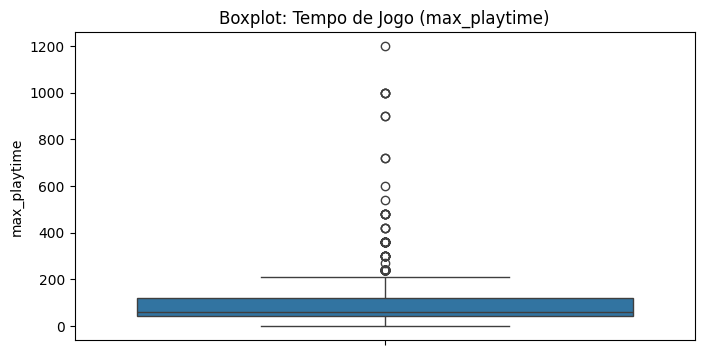

In [9]:
# 3) Boxplot de tempo
plt.figure(figsize=(8,4))
sns.boxplot(df["max_playtime"])
plt.title("Boxplot: Tempo de Jogo (max_playtime)")
plt.show()


In [10]:
# 4) Cálculo de IQR e identificação de outliers
Q1 = df["max_playtime"].quantile(0.25)
Q3 = df["max_playtime"].quantile(0.75)
IQR = Q3 - Q1

limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

outliers = df[(df["max_playtime"] > limite_superior) | (df["max_playtime"] < limite_inferior)]

print("Quantidade de outliers:", len(outliers))

Quantidade de outliers: 108


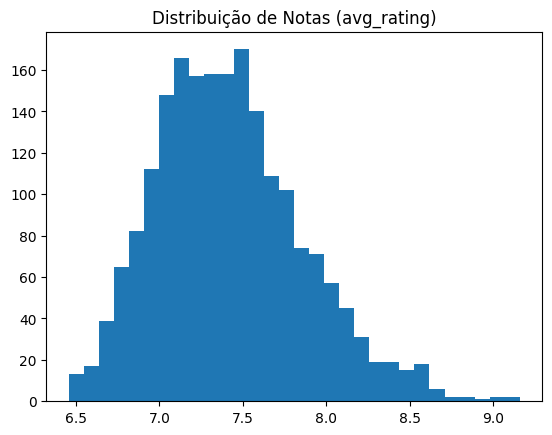

In [11]:
# 1) Histograma da nota média
plt.hist(df["avg_rating"], bins=30)
plt.title("Distribuição de Notas (avg_rating)")
plt.show()

📌 Comentário:
Observe visualmente se a distribuição é simétrica ou assimétrica.

In [15]:
# 3) Aplicando log ao tempo de jogo
df["log_playtime"] = np.log1p(df["max_playtime"])  # log1p evita log(0)

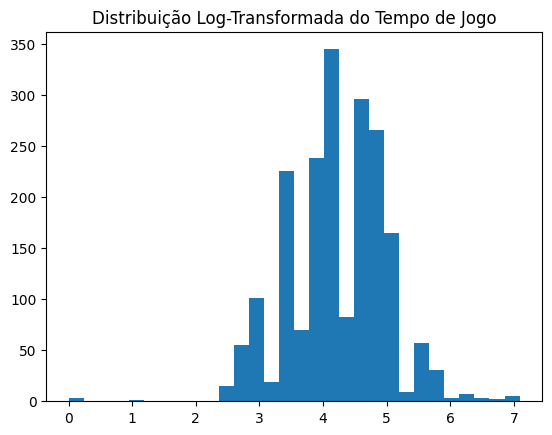

In [16]:
# 4) Novo histograma
plt.hist(df["log_playtime"], bins=30)
plt.title("Distribuição Log-Transformada do Tempo de Jogo")
plt.show()

📌 Comentário:
Compare a distribuição original com a log-transformada e observe
se ela ficou mais normalizada.

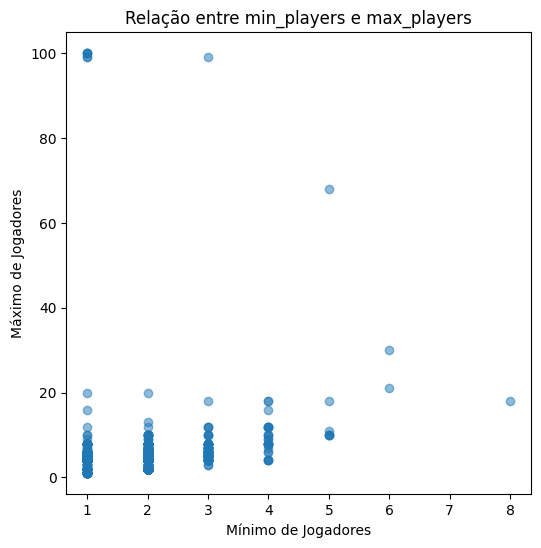

In [17]:
# 1) Scatter plot min vs max players
plt.figure(figsize=(6,6))
plt.scatter(df["min_players"], df["max_players"], alpha=0.5)
plt.xlabel("Mínimo de Jogadores")
plt.ylabel("Máximo de Jogadores")
plt.title("Relação entre min_players e max_players")
plt.show()

📌 Comentário:
A partir do gráfico, verifique se há correlação linear.

In [18]:
# 3) Matriz de correlação
corr = df.corr(numeric_only=True)


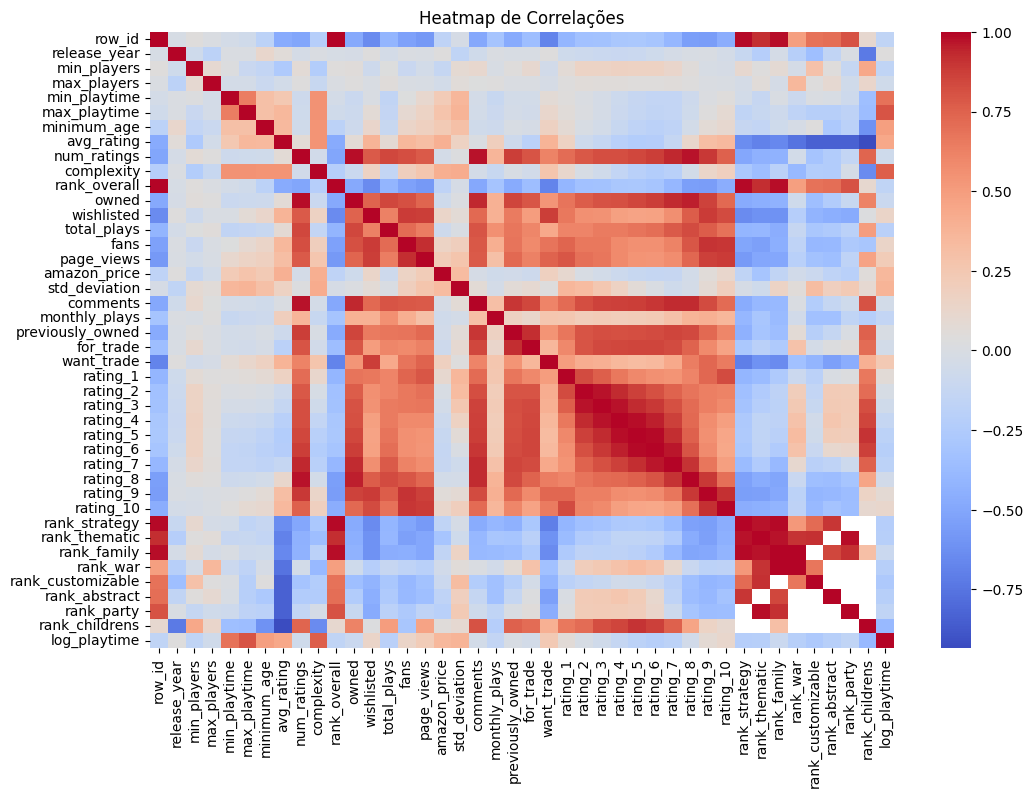

In [19]:
# 4) Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Heatmap de Correlações")
plt.show()

In [20]:
# Identificando maiores correlações positivas
corr_pairs = corr.unstack().sort_values(ascending=False)
print("Top correlações:\n", corr_pairs.head(10))

Top correlações:
 log_playtime      log_playtime        1.0
row_id            row_id              1.0
rank_overall      rank_overall        1.0
want_trade        want_trade          1.0
rating_7          rating_7            1.0
rating_9          rating_9            1.0
minimum_age       minimum_age         1.0
avg_rating        avg_rating          1.0
previously_owned  previously_owned    1.0
rank_abstract     rank_abstract       1.0
dtype: float64


📌 Perguntas:
- Par com maior correlação positiva: Veja corr_pairs.head()
- Par com correlação mais próxima de zero: Veja corr_pairs para valores próximos de 0

In [21]:
# 1) Conferir coluna de ano
df["release_year"].head()

# 2) Criar coluna de década
df["Decada"] = (df["release_year"] // 10) * 10

# 3) Contagem de lançamentos por década
contagem = df.groupby("Decada")["boardgame"].count()
print("Jogos por década:\n", contagem)

Jogos por década:
 Decada
0          3
1470       1
1580       1
1630       1
1800       1
1810       1
1850       1
1870       1
1920       1
1950       1
1960       2
1970       9
1980      25
1990      74
2000     280
2010    1031
2020     567
Name: boardgame, dtype: int64


📌 A década com mais jogos lançados é: contagem.idxmax()
📌 Quantidade: contagem.max()

In [22]:
print("Década com mais lançamentos:", contagem.idxmax())
print("Número de jogos:", contagem.max())

Década com mais lançamentos: 2010
Número de jogos: 1031
